# Introduction to the Spiking Neural Network Architecture
## *Brain Inspired Computing with SpiNNaker*

<img src="https://spinnaker-tutorial.readthedocs.io/en/latest/img/setup.jpg" alt="SpiNNaker board" width="600"/>

## Why *neuromorphic* computing?
"Don't simulate a brain, build one!"

- Motivation: design and build from the ground (e.g. transistor) up with a **practical** engineered system in mind

- Dedicated hardware places the *brain* in the physical world &#8594; embodied (neuro)science (e.g. robotics)
    - towards hardware/brain-in-the-loop ?

- Huge discrepancy between the efficiency of a biological brain and artificial *brains*
    - Biological brain communication is event-driven &#8594; asynchronous, local computing
    - **Yet**, over the shortest distances,  communication is best described by analog processes (e.g., chemical process underlying synaptic dynamics)
    - von Neumann architecture bottleneck on conventional computers
    - while GPU and HPC are great at handling large data structures "linearly", brain-like communication involves transmitting small data packets (i.e. spikes) to many targets

&#8756; **VLSI philosophy**: combine IC fabrication and system-level architecture to produce truly integrated systems

<a href="https://www.frontiersin.org/articles/10.3389/fnins.2013.00118/full"><img src="https://www.frontiersin.org/files/Articles/26976/fnins-07-00118-HTML/image_m/fnins-07-00118-g001.jpg" alt="Power efficiency scaling" width="400"></a>

**N.B.** MAC: multiply-accumulate operation, i.e. $a \leftarrow a + (b \times c)$

- Computational neuroscience: neuromorphic hardware becomes a tool to validate hypotheses

> "*No neuromorphic system attempts to reproduce all of the biological detail, but all adhere to the idea that computation is **highly distributed** across small computing elements analogous in some way to
neurons, connected into networks, with some degree of **flexibility** in the way **connections** are formed. That much is common; the details vary greatly.*" - Steve Furber

## Early beginnings

<a href="http://www.rossashby.info/letters/turing.html"><img src="http://www.rossashby.info/letters/images/wralx018.jpg" alt="Letter" width="600"></a>

- 1948: Alan Turing presents a *connectionist* approach to computing in *Intelligent Machinery* [(Turing, 1948)](https://www.npl.co.uk/getattachment/about-us/History/Famous-faces/Alan-Turing/80916595-Intelligent-Machinery.pdf?lang=en-GB), with his concept of unorganized machine.

<a href="http://www.alanturing.net/turing_archive/pages/Reference%20Articles/connectionism/Turing%27s%20neural%20networks.html"><img src="http://www.alanturing.net/turing_archive/graphics/turingsbtype.gif" alt="Unorganized machine" width="600"></a>

- 1948: Alan Turing works on the [Manchester computers](https://en.wikipedia.org/wiki/Manchester_computers) (Manchester Mark 1)

<a href="https://blog.scienceandindustrymuseum.org.uk/alan-turing-manchester-connection/"><img src="https://blog.scienceandindustrymuseum.org.uk/wp-content/uploads/2019/07/Turing-Ferranti-marketing-image.jpg" alt="Alan Turing Manchester" width="600"></a>

## Fast forward 30 years ...

"*All neuromorphic roads lead to Carver Mead.*" - [Chris Eliasmith](https://youtu.be/nXyowrK4Nvo)

- 1980: [Carver Mead](http://www.lloydwatts.com/carver_MIT_2004.pdf) and Lynn Conway publish *Introduction to VLSI Systems*

<a href="https://ai.eecs.umich.edu/people/conway/Awards/Electronics/ElectAchiev.html"><img src="https://ai.eecs.umich.edu/people/conway/Awards/Electronics/Highlights.jpg" alt="Mead and Conway" width="600"></a>

- 1981: Carver Mead, John Hopfield and Richard Feynman collaborate on the course *Physics of Computation*
    - 1982: Hopfield popularizes a neural network model of memory which we now know as the *Hopfield network*
    - 1983: Feynman teaches "Potentialities and Limitations of Computing Machines" at Caltech, now known as the *Feynman Lectures on Computation* (1996) and eventually looked at quantum computing. and eventually looked at quantum computing.
    - 1986-1991: Mead and his students create the first neural-chip models to mimic touch (1986), hearing (1988) and vision (1991). Any [working system](https://www.nature.com/articles/s41928-020-0448-2.pdf) made it to Mead's book *Analog VLSI and neural systems* (1989)

- 1991: Misha Mahowald creates the first *silicon retina*, precursor to the dynamic vision sensor (DVS) or [event-camera](https://arxiv.org/pdf/1904.08405.pdf)

- 1990s: Mead and his students popularize the [address-event representation](https://web.stanford.edu/group/brainsinsilicon/documents/methAER.pdf) (AER) protocol for transferring spikes between bio-inspired chips (**high level**: allocating individual wires to each spike source, or neuron, is not feasible as it becomes increasingly more difficult to scale; instead, associate each spike source with a unique address and use a shared bus)

## Meanwhile ...

- 1980s: [Steve Furber](https://www.youtube.com/watch?v=2e06C-yUwlc) is working for Acorn Computers Limited, which eventually became (in part) ARM
- 1990s: Steve Furber joins the University of Manchester, where he works on novel microprocessors and asynchronous computing.
    - While working on associative memory, the Advanced Processor Technologies group recognizes that the architecture they're after resembles that of a neural network
    - The group's expertise lies in digital architectures and processors, not so much in analog circuit design
- 2000s: Given the importance of scalability, Furber et al. revisit AER which has its limitations for large scale, multicore systems. They transform the bus-based protocol into a packet-switched system, with local routing table on each chips.

## Today

In [1]:
from IPython.display import IFrame

[Steve Furber et al.](https://sos-ch-dk-2.exo.io/public-website-production/filer_public/9b/b2/9bb2d52a-5ff3-4f6e-8a5f-b733608f80b9/bernstein_nmc_sept20.pdf), September 2020:

In [2]:
IFrame("https://sos-ch-dk-2.exo.io/public-website-production/filer_public/9b/b2/9bb2d52a-5ff3-4f6e-8a5f-b733608f80b9/bernstein_nmc_sept20.pdf#page=3", width=900, height=500)

### IBM TrueNorth

Primary use: real-time cognitive applications

Notable features:
- digital
- purely deterministic (i.e. software model is replicated exactly and software emulator may be used to predict performance of hardware)
- simulates leaky integrate-and-fire (LIF) neurons

<a href="https://iopscience.iop.org/article/10.1088/1741-2560/13/5/051001"><img src="https://www.researchgate.net/publication/306248734/figure/fig4/AS:396057763696642@1471438937292/The-NS16e-circuit-board-incorporating-16-IBM-TrueNorth-chips-Photo-courtesy-of-IBM-Corp.png" alt="TrueNorth" width="400"></a>



### Intel Loihi

Primary use: geared toward practical applications

Notable features:
- digital
- based on leaky integrate-and-fire (LIF) neuron
- **Yet** programmable synapse models for on-chip learning (?)
- ships in different shapes and sizes: Kapoho, Nahuku, Pohoiki

<a href="https://www.intel.ca/content/www/ca/en/research/neuromorphic-computing.html"><img src="https://en.wikichip.org/w/images/thumb/5/51/loihi_nahuku_board.png/1200px-loihi_nahuku_board.png" alt="TrueNorth" width="350"></a>

### BrainScaleS (Heidelberg University, HBP)

Primary use: understanding biological systems, specficially long-term learning

Notable features:
- analog
- physical models of neuronal processes (ionic circuits &#8594; electrical circuits) based on the adaptive exponential integrate-and-fire (AdExp) neuron model
- can run in accelerated mode, up to 10 000 times faster than real-time, hence the long-term learning objective

<a href="https://iopscience.iop.org/article/10.1088/1741-2560/13/5/051001"><img src="https://www.researchgate.net/publication/306248734/figure/fig7/AS:396057763696647@1471438937704/The-Brainscales-20-wafer-machine-The-wafer-modules-are-mounted-four-per-cabinet-in-five_Q640.jpg" alt="BrainScaleS" width="300"></a>

### SpiNNaker (University of Manchester, HBP)

Primary use: modelling biological nervous systems in biological real-time

Notable features:
- digital (ARM968 processors) (nitpicking: not neuromorphic *per se*, but "neurocomputer" or "neural accelerator")
- massively parallel computing
- programmable models (allows researching different neural models and plasticity rules)
- design guidelines: scalability and energy-efficiency

The **efficiency** stems from the highly distributed architecture and the close proximity of processing and memory units (i.e., frequently used data is kept within 1-2 mm of the processor on each core).

<img src="https://www.researchgate.net/publication/325792393/figure/fig2/AS:637841730183181@1529084727458/The-48-node-864-core-SpiNNaker-circuit-board-Online-version-in-colour.png" alt="SpiNNaker chip organization" width="400"><img src="https://apt.cs.manchester.ac.uk/Images/spinn_labeled_bw.png" alt="SpiNNaker chip organization" width="400">

The **scalability** is supported by local routing and the ingenious organization/stacking of boards.

In [3]:
IFrame("https://ec.europa.eu/information_society/newsroom/image/document/2017-8/1_furber_steve_and_meier_karlheinz_CDA4E45F-EF31-6FBF-1642BB9BAB97CEF4_43088.pdf#page=15", width=900, height=500)

**March, 2016**: $18 \times 48 \times 24 \times 5 \times 5 = 518 400$ core machine

**October, 2018**: $18 \times 48 \times 24 \times 5 \times 10 = 1 036 800$ core machine

<a href="https://en.wikipedia.org/wiki/SpiNNaker"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/97/Spinn_1m_pano.jpg/1024px-Spinn_1m_pano.jpg" alt="1mio core SpiNNaker" width="750"></a>

**2021-2022**: SpiNNaker2

#### Further reading

- [SpiNNaker 2](https://arxiv.org/pdf/1911.02385.pdf) (early stage, 2019)
- [Book about the SpiNNaker project](https://www.research.manchester.ac.uk/portal/files/161744279/978_1_68083_653_0.pdf): *SpiNNaker: A Spiking Neural Network Architecture*, Furber & Bogdan (2020)
- [sPyNNaker: using PyNN on SpiNNaker](https://www.frontiersin.org/articles/10.3389/fnins.2018.00816/full) (2018, version: 4.0.0, **latest: 6.0.0**)

## Programming SpiNNaker

<a href="https://www.frontiersin.org/articles/10.3389/fnins.2018.00816/full"><img src="https://www.frontiersin.org/files/Articles/422311/fnins-12-00816-HTML/image_m/fnins-12-00816-g002.jpg" alt="sPyNNaker workflow" width="600"></a>

In [4]:
IFrame("http://spinnakermanchester.github.io/2015.005.Arbitrary/workshop_material/proceedings/slides/Running_PyNN_Simulations_On_SpiNNaker.pdf#page=4", width=900, height=500)

### Demo: E-I balanced random network

<a href="https://www.frontiersin.org/articles/10.3389/fnins.2018.00816/full"><img src="https://www.frontiersin.org/files/Articles/422311/fnins-12-00816-HTML/image_m/fnins-12-00816-g003.jpg" alt="sPyNNaker workflow" width="750"></a>

In [5]:
# Simulation setup

# Backend
# import pyNN.nest as sim
import pyNN.spiNNaker as sim

# Initialise simulator: 1ms timestep by default --> biological real-time
sim.setup(timestep=1)

2021-07-14 16:33:22 INFO: Read cfg files: /home/lja/Documents/toronto/research/software/theta-dbs/venv/lib/python3.8/site-packages/spinn_front_end_common/interface/spinnaker.cfg, /home/lja/Documents/toronto/research/software/theta-dbs/venv/lib/python3.8/site-packages/spynnaker/pyNN/spynnaker.cfg, /home/lja/.spynnaker.cfg
2021-07-14 16:33:22 INFO: Will search these locations for binaries: /home/lja/Documents/toronto/research/software/theta-dbs/venv/lib/python3.8/site-packages/spinn_front_end_common/common_model_binaries : /home/lja/Documents/toronto/research/software/theta-dbs/venv/lib/python3.8/site-packages/spynnaker/pyNN/model_binaries
2021-07-14 16:33:22 INFO: Setting time scale factor to 2.
2021-07-14 16:33:22 INFO: Setting machine time step to 1000 micro-seconds.


['/home/lja/Documents/toronto/research/software/theta-dbs/venv/lib/python3.8/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/lja/Documents/toronto/research/software/theta-dbs/venv/lib/python3.8/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/lja/.spynnaker.cfg']


0

In [6]:
# Spike input
poisson_spike_source = sim.Population(250, sim.SpikeSourcePoisson(
    rate=50, duration=5000), label='poisson_source')

spike_source_array = sim.Population(250, sim.SpikeSourceArray,
                                    {'spike_times': [1000]},
                                    label='spike_source')

In [7]:
# Neuron Parameters
cell_params_exc = {
    'tau_m': 20.0, 'cm': 1.0, 'v_rest': -65.0, 'v_reset': -65.0,
    'v_thresh': -50.0, 'tau_syn_E': 5.0, 'tau_syn_I': 15.0,
    'tau_refrac': 0.3, 'i_offset': 0}

cell_params_inh = {
    'tau_m': 20.0, 'cm': 1.0, 'v_rest': -65.0, 'v_reset': -65.0,
    'v_thresh': -50.0, 'tau_syn_E': 5.0, 'tau_syn_I': 5.0,
    'tau_refrac': 0.3, 'i_offset': 0}

In [8]:
# Neuronal populations
pop_exc = sim.Population(500, sim.IF_curr_exp(**cell_params_exc),
                         label='excitatory_pop')

pop_inh = sim.Population(125, sim.IF_curr_exp(**cell_params_inh),
                         label='inhibitory_pop')

# Generate random distributions from which to initialise parameters
rng = sim.NumpyRNG(seed=98766987, parallel_safe=True)

# Initialise membrane potentials uniformly between threshold and resting
pop_exc.set(v=sim.RandomDistribution('uniform',
                                     [cell_params_exc['v_reset'],
                                      cell_params_exc['v_thresh']],
                                     rng=rng))

In [9]:
# Distribution from which to allocate delays
delay_distribution = sim.RandomDistribution('uniform', [1, 10], rng=rng)

# Spike input projections
spike_source_projection = sim.Projection(spike_source_array, pop_exc,
                                         sim.FixedProbabilityConnector(p_connect=0.05),
                                         synapse_type=sim.StaticSynapse(weight=0.1, delay=delay_distribution),
                                         receptor_type='excitatory')

# Poisson source projections
poisson_projection_exc = sim.Projection(poisson_spike_source, pop_exc,
                                        sim.FixedProbabilityConnector(p_connect=0.2),
                                        synapse_type=sim.StaticSynapse(weight=0.06, delay=delay_distribution),
                                        receptor_type='excitatory')

poisson_projection_inh = sim.Projection(poisson_spike_source, pop_inh,
                                        sim.FixedProbabilityConnector(p_connect=0.2),
                                        synapse_type=sim.StaticSynapse(weight=0.03, delay=delay_distribution),
                                        receptor_type='excitatory')

In [10]:
# Recurrent projections
exc_exc_rec = sim.Projection(pop_exc, pop_exc,
                             sim.FixedProbabilityConnector(p_connect=0.1),
                             synapse_type=sim.StaticSynapse(weight=0.03, delay=delay_distribution),
                             receptor_type='excitatory')

exc_exc_one_to_one_rec = sim.Projection(pop_exc, pop_exc,
                                        sim.OneToOneConnector(),
                                        synapse_type=sim.StaticSynapse(weight=0.03, delay=delay_distribution),
                                        receptor_type='excitatory')

inh_inh_rec = sim.Projection(pop_inh, pop_inh,
                             sim.FixedProbabilityConnector(p_connect=0.1),
                             synapse_type=sim.StaticSynapse(weight=0.03, delay=delay_distribution),
                             receptor_type='inhibitory')

# Projections between neuronal populations
exc_to_inh = sim.Projection(pop_exc, pop_inh,
                            sim.FixedProbabilityConnector(p_connect=0.2),
                            synapse_type=sim.StaticSynapse(weight=0.06, delay=delay_distribution),
                            receptor_type='excitatory')

inh_to_exc = sim.Projection(pop_inh, pop_exc,
                            sim.FixedProbabilityConnector(p_connect=0.2),
                            synapse_type=sim.StaticSynapse(weight=0.06, delay=delay_distribution),
                            receptor_type='inhibitory')

In [11]:
# Specify output recording
pop_exc.record('spikes')
pop_inh.record('spikes')

# Run simulation
sim.run(simtime=5000)

# Extract results data
exc_data = pop_exc.get_data('spikes')
inh_data = pop_inh.get_data('spikes')

# Exit simulation
sim.end()

2021-07-14 16:33:22 INFO: Starting execution process
2021-07-14 16:33:22 INFO: Simulating for 5000 1.0ms timesteps using a hardware timestep of 2000us
2021-07-14 16:33:22 INFO: Creating transceiver for 192.168.240.1
2021-07-14 16:33:22 INFO: Working out if machine is booted
2021-07-14 16:33:26 INFO: Attempting to boot machine
2021-07-14 16:33:32 INFO: Found board with version [Version: SC&MP 3.4.1 at SpiNNaker:0:0:0 (built Thu Feb 11 09:36:44 2021)]
2021-07-14 16:33:32 INFO: Machine communication successful
2021-07-14 16:33:32 INFO: Detected a machine on IP address 192.168.240.1 which has 855 cores and 120.0 links
2021-07-14 16:33:32 INFO: Time 0:00:09.984078 taken by MachineGenerator
Preallocating resources for Extra Monitor support vertices
|0%                          50%                         100%|
2021-07-14 16:33:33 INFO: Time 0:00:00.166603 taken by PreAllocateResourcesForExtraMonitorSupport
2021-07-14 16:33:33 INFO: Time 0:00:00.000924 taken by NetworkSpecificationReport
Allo

In [12]:
# Plotting
import matplotlib.pyplot as plt
from pyNN.utility.plotting import Figure, Panel
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

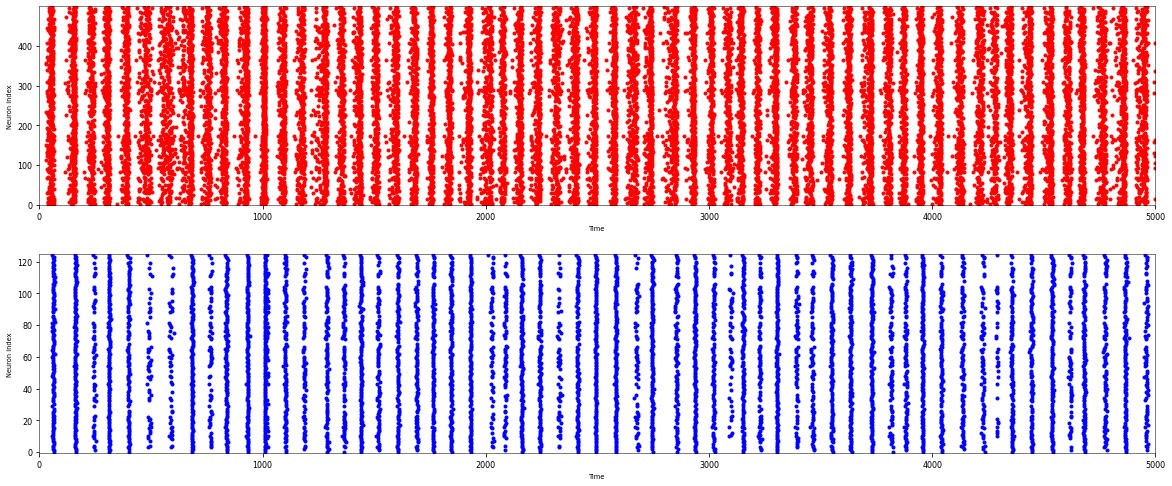

In [13]:
Figure(Panel(exc_data.segments[0].spiketrains, color='red', xlabel='Time', ylabel='spikes', xticks=True, yticks=True),
      Panel(inh_data.segments[0].spiketrains, color='blue', xlabel='Time', ylabel='spikes', xticks=True, yticks=True), size=(20, 8));

# Questions